In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tesla.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


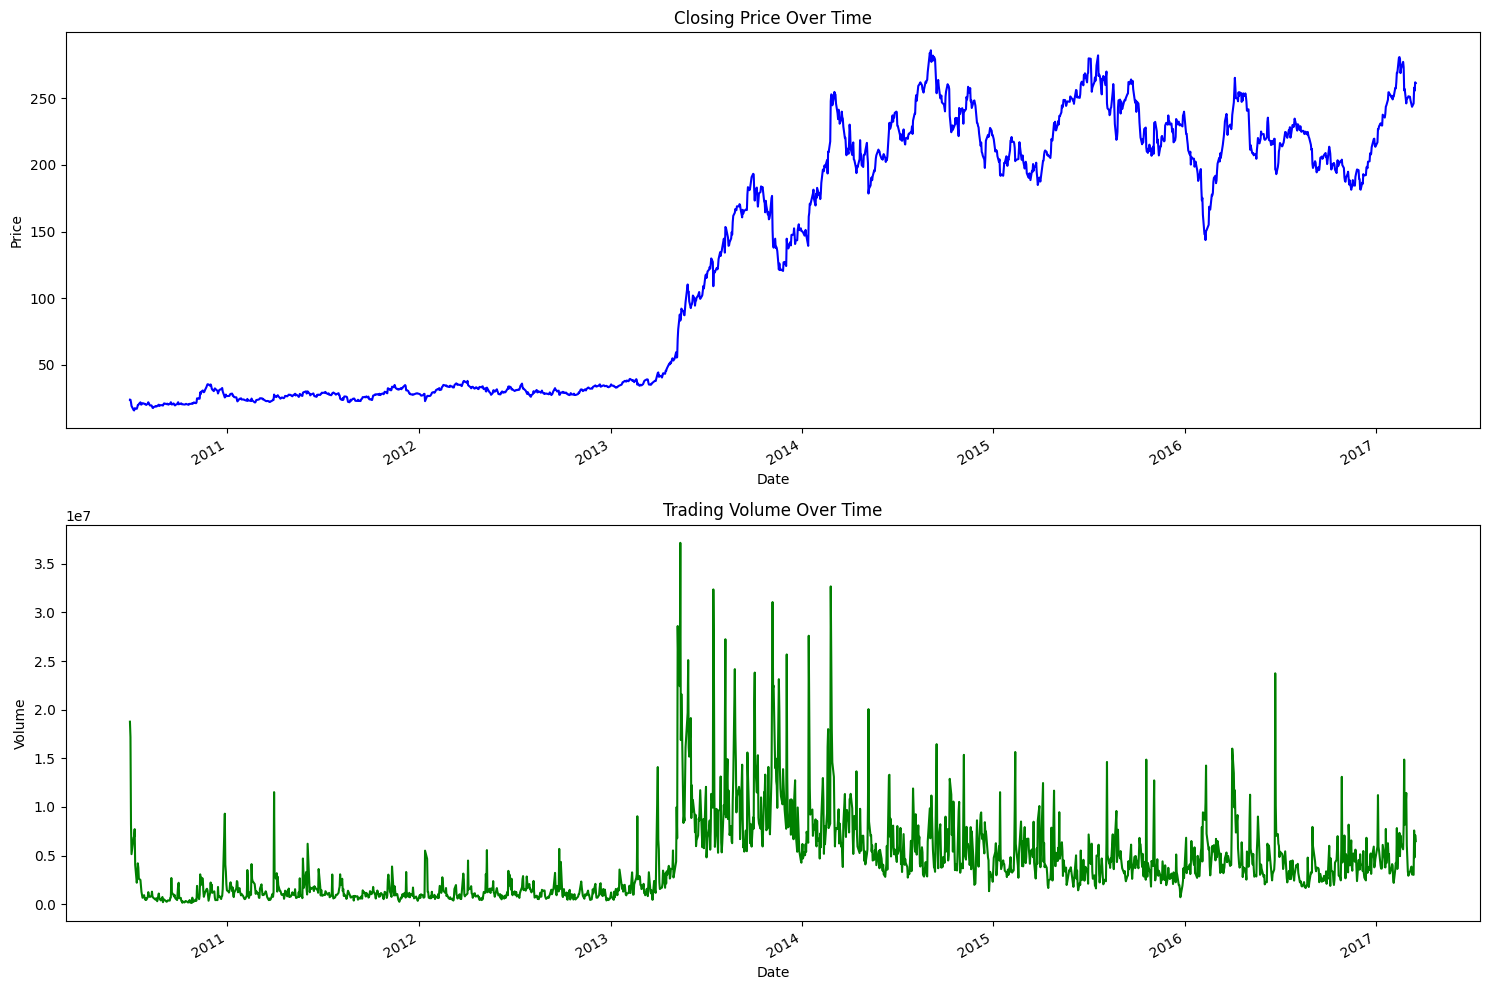

In [11]:
fig, ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))

df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price')

df['Volume'].plot(ax=ax[1],color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')

plt.tight_layout()
plt.show();

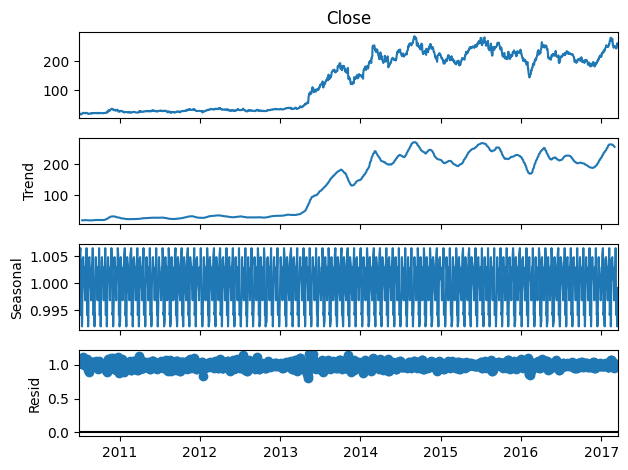

In [14]:
decomposess = seasonal_decompose(df['Close'], model='multiplicative',period= 20)
decomposess.plot();

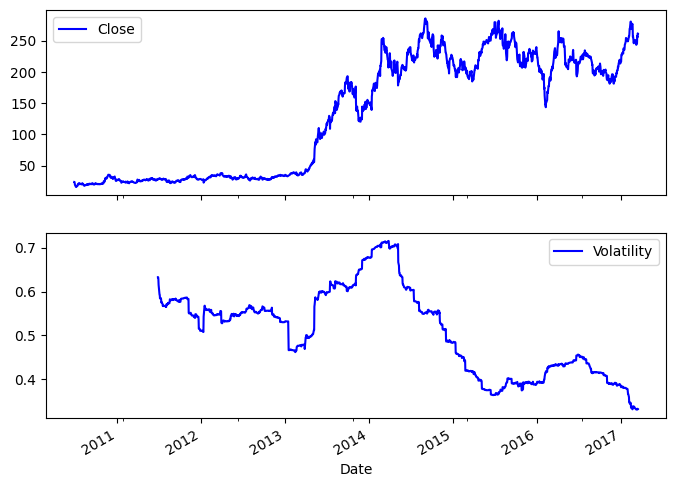

In [15]:
# Volatility Analysis
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)
df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

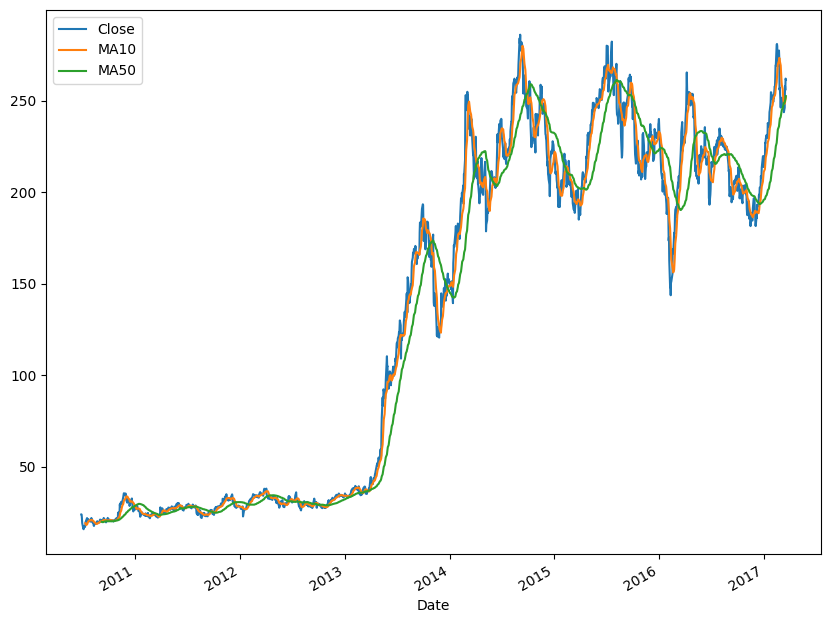

In [16]:
# Moving Average Analysis
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()

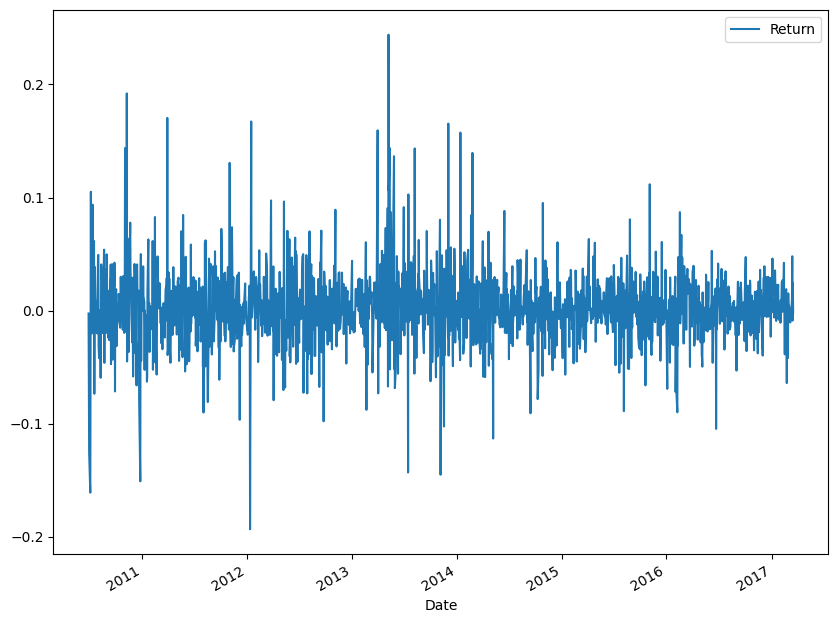

In [17]:

# Return Analysis
df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

In [ ]:
# Prepare the data for Prophet, In this case we only do the univariate analysis
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

prophet_df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [19]:
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

21:02:15 - cmdstanpy - INFO - Chain [1] start processing
21:02:15 - cmdstanpy - INFO - Chain [1] done processing


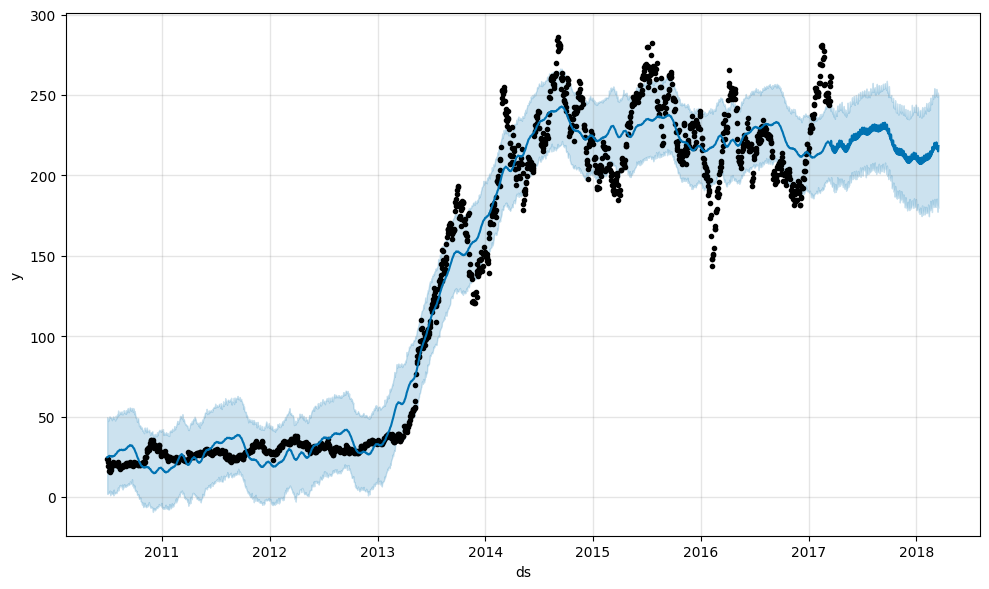

In [20]:
model.plot(forecast)
plt.show();

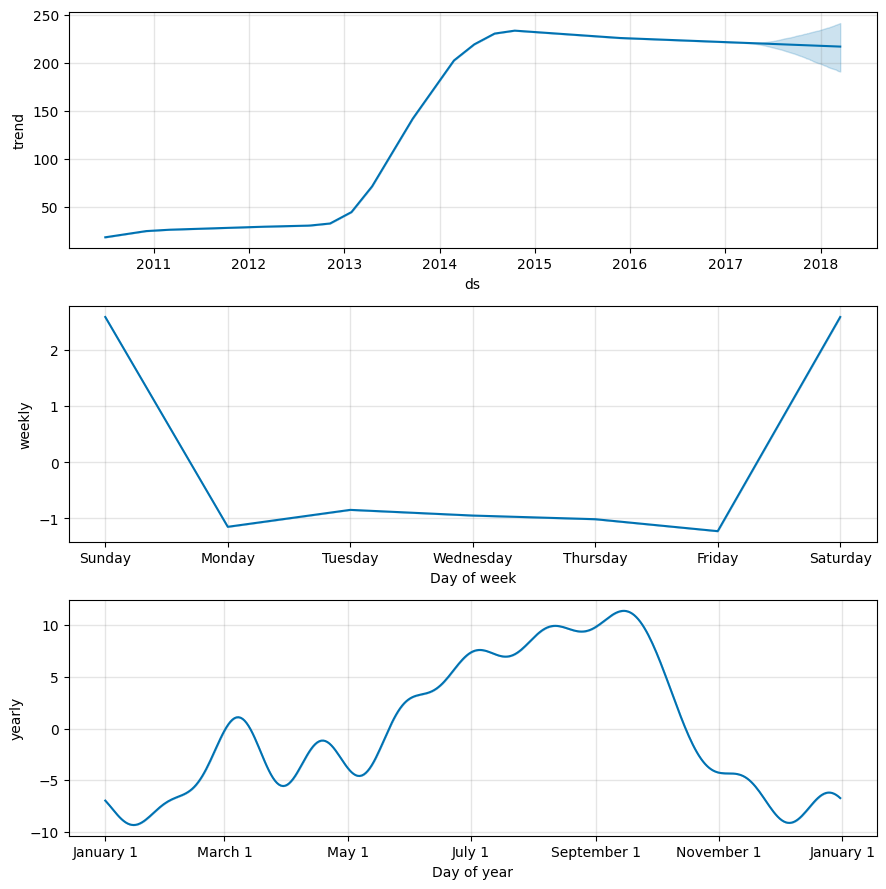

In [21]:
model.plot_components(forecast);